## Imports

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import train_test_split

# Original Data

In [104]:
data = pd.read_csv("./Wine_Test_02.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


## Data preprocessing

check for NA values

In [105]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## **A)** Plot histogram of each attribute regarding Y=0, Y=1 and Y=2, and display the number of samples (Y) for each quality classes.

segregation of dataframe rows as per the categorical classes of the quality feature

In [106]:
class_0 = data[(data["quality"] == 0)]
class_1 = data[(data["quality"] == 1)]
class_2 = data[(data["quality"] == 2)]

quality_data = {"Poor Quality": class_0, "Medium Quality": class_1, "Premium Quality": class_2}

#### Quality-Wise feature distribution

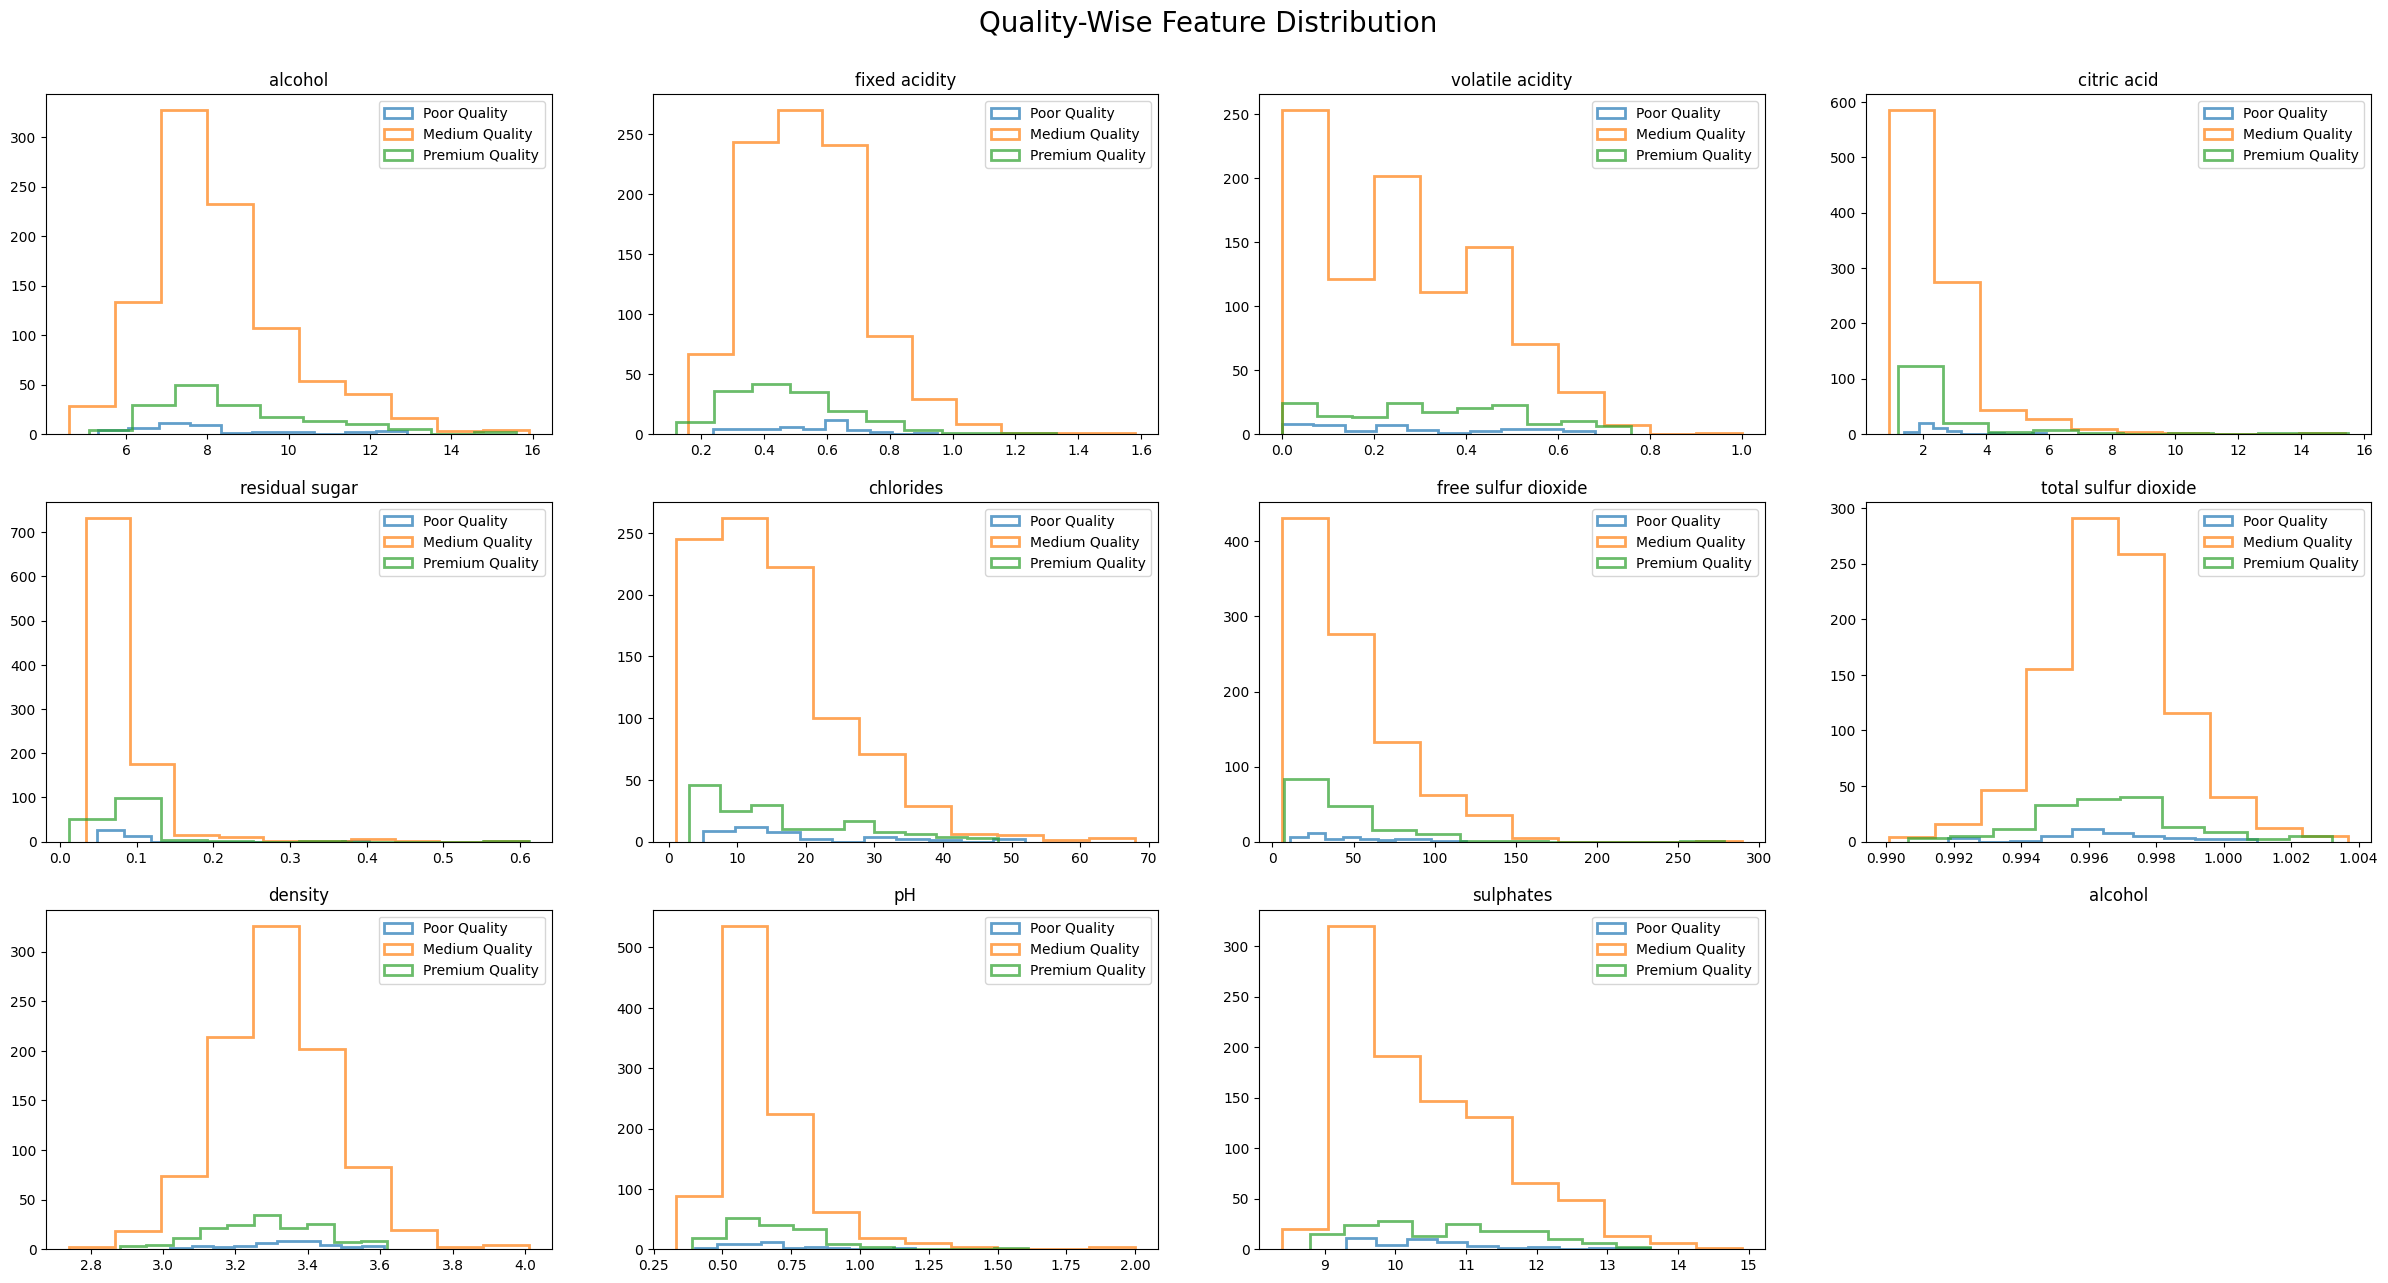

In [107]:
plt.figure(figsize=(30, 15))
plt.title("Quality-Wise Feature Distribution", pad=45, fontdict={"size":20})
for quality in quality_data.keys():
    cols = quality_data[quality].columns[:-1]
    class_data = quality_data[quality]

    plt.ylabel("Frequency")
    plt.axis("off")

    for i in range(4):
        for j in range(3):
            idx = (i*3) + j
            col_name = cols[idx - 1]
            if(idx + 1 == 12):
                plt.subplot(3,4,idx + 1), plt.hist(class_data[cols[idx - 1]], density=True, alpha=0), plt.title(col_name)
            else:
                plt.subplot(3,4,idx + 1), plt.hist(class_data[cols[idx]], alpha=0.7, histtype="step", linewidth=2, label=str(quality)), plt.title(col_name)
                plt.legend(["Poor Quality", "Medium Quality", "Premium Quality"])

#### Class frequency plot

In [108]:
class_sample_distribution = {}
for key in quality_data.keys():
    class_sample_distribution[key] = len(quality_data[key])

<BarContainer object of 3 artists>

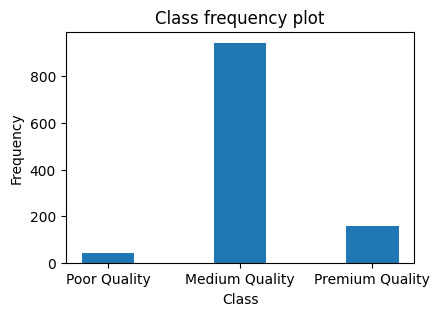

In [109]:
plt.figure(figsize=(4.5,3))
plt.title("Class frequency plot")
plt.xlabel("Class"), plt.ylabel("Frequency")
plt.bar(class_sample_distribution.keys(), class_sample_distribution.values(), width=0.4)

#### Answering Questions

**What can you say regarding the quality (Y) classes distribution?**

It is clear that the classes are unequally distributed. There is a large number of medium quality wine samples and a very low number of samples of the poor and premium quality wine.

**What is your conclusion regarding the expected performance of the classifier?**

Due to the biased nature of class sample frequencies, it is expected that the model will generalize poorly on real life data. The model may have high accuracy, in this case by classifiying the majority class correctly but has low classification accuracy for the poor and premium class when seen indivisually.

## **B)** Perform one run of modeling and test. Compare the obtained test accuracy by using:
1. One versus All Classifier
And
2. One versus One Classifier

generate dataset for train and test using stratified sampling to keep same ratios of target classes in train and test

In [110]:
X, y = data[data.columns[:-1]], data[data.columns[-1]]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=3)

feature scaling

In [111]:
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#### **One VS One Classification**

In [112]:
ovo = OneVsOneClassifier(
    LogisticRegression(max_iter=500, penalty='l2')
).fit(x_train, y_train)

y_pred = ovo.predict(x_test)

**confusion matrix**

[]

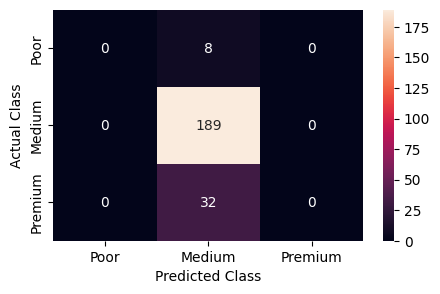

In [113]:
cf_martix_df = pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=y_test), index = ["Poor", "Medium", "Premium"],
                  columns = ["Poor", "Medium", "Premium"])
plt.figure(figsize = (5,3))
heatmap = sns.heatmap(cf_martix_df, annot=True, fmt="g")
heatmap.set_xlabel("Predicted Class")
heatmap.set_ylabel("Actual Class")
plt.plot()

here we can see that all predictions for the poor class were incorrect and more than half the predictions of premium class were also incorrect which is not desirable, even though we have a high accuracy (below) supported majorly by the medium quality class due to heavy class imbalance (Model can classify the medium quality class correctly often due to the high number of samples)

**classification report**

In [114]:
print(classification_report(y_pred=y_pred, y_true=y_test, zero_division=True))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         8
           1       0.83      1.00      0.90       189
           2       1.00      0.00      0.00        32

    accuracy                           0.83       229
   macro avg       0.94      0.33      0.30       229
weighted avg       0.86      0.83      0.75       229



#### **One VS Rest Classification**

In [115]:
ovo = OneVsRestClassifier(
    LogisticRegression(penalty='l2')
).fit(x_train, y_train)

y_pred = ovo.predict(x_test)

**confusion matrix**

[]

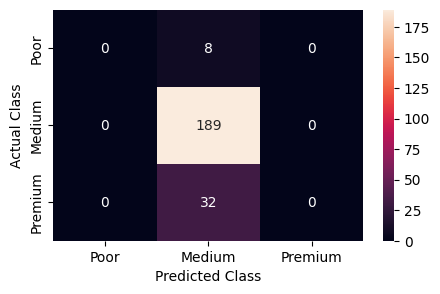

In [116]:
cf_martix_df = pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=y_test), index = ["Poor", "Medium", "Premium"],
                  columns = ["Poor", "Medium", "Premium"])
plt.figure(figsize = (5,3))
heatmap = sns.heatmap(cf_martix_df, annot=True, fmt="g")
heatmap.set_xlabel("Predicted Class")
heatmap.set_ylabel("Actual Class")
plt.plot()

here we can see that all predictions for the poor class were incorrect and more than half the predictions of premium class were also incorrect which is not desirable, even though we have a high accuracy supported majorly by the medium class due to heavy class imbalance

**classification report**

In [117]:
print(classification_report(y_pred=y_pred, y_true=y_test, zero_division=True))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         8
           1       0.83      1.00      0.90       189
           2       1.00      0.00      0.00        32

    accuracy                           0.83       229
   macro avg       0.94      0.33      0.30       229
weighted avg       0.86      0.83      0.75       229



# New Data

In [118]:
data_new = pd.read_csv("./Wine_Test_02_6_8_red.csv")
data_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,2
1,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.9969,3.04,1.08,9.2,1
2,7.6,0.39,0.31,2.3,0.082,23.0,71.0,0.9982,3.52,0.65,9.7,1
3,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,2
4,7.3,0.45,0.36,5.9,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,1


## Data preprocessing

check for NULL values

In [119]:
data_new.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Visualization

segregation of dataframe rows as per the categorical classes of the quality feature

In [120]:
class_0 = data_new[(data_new["quality"] == 0)]
class_1 = data_new[(data_new["quality"] == 1)]
class_2 = data_new[(data_new["quality"] == 2)]

quality_data = {"Poor Quality": class_0, "Medium Quality": class_1, "Premium Quality": class_2}

#### Quality-Wise feature distribution

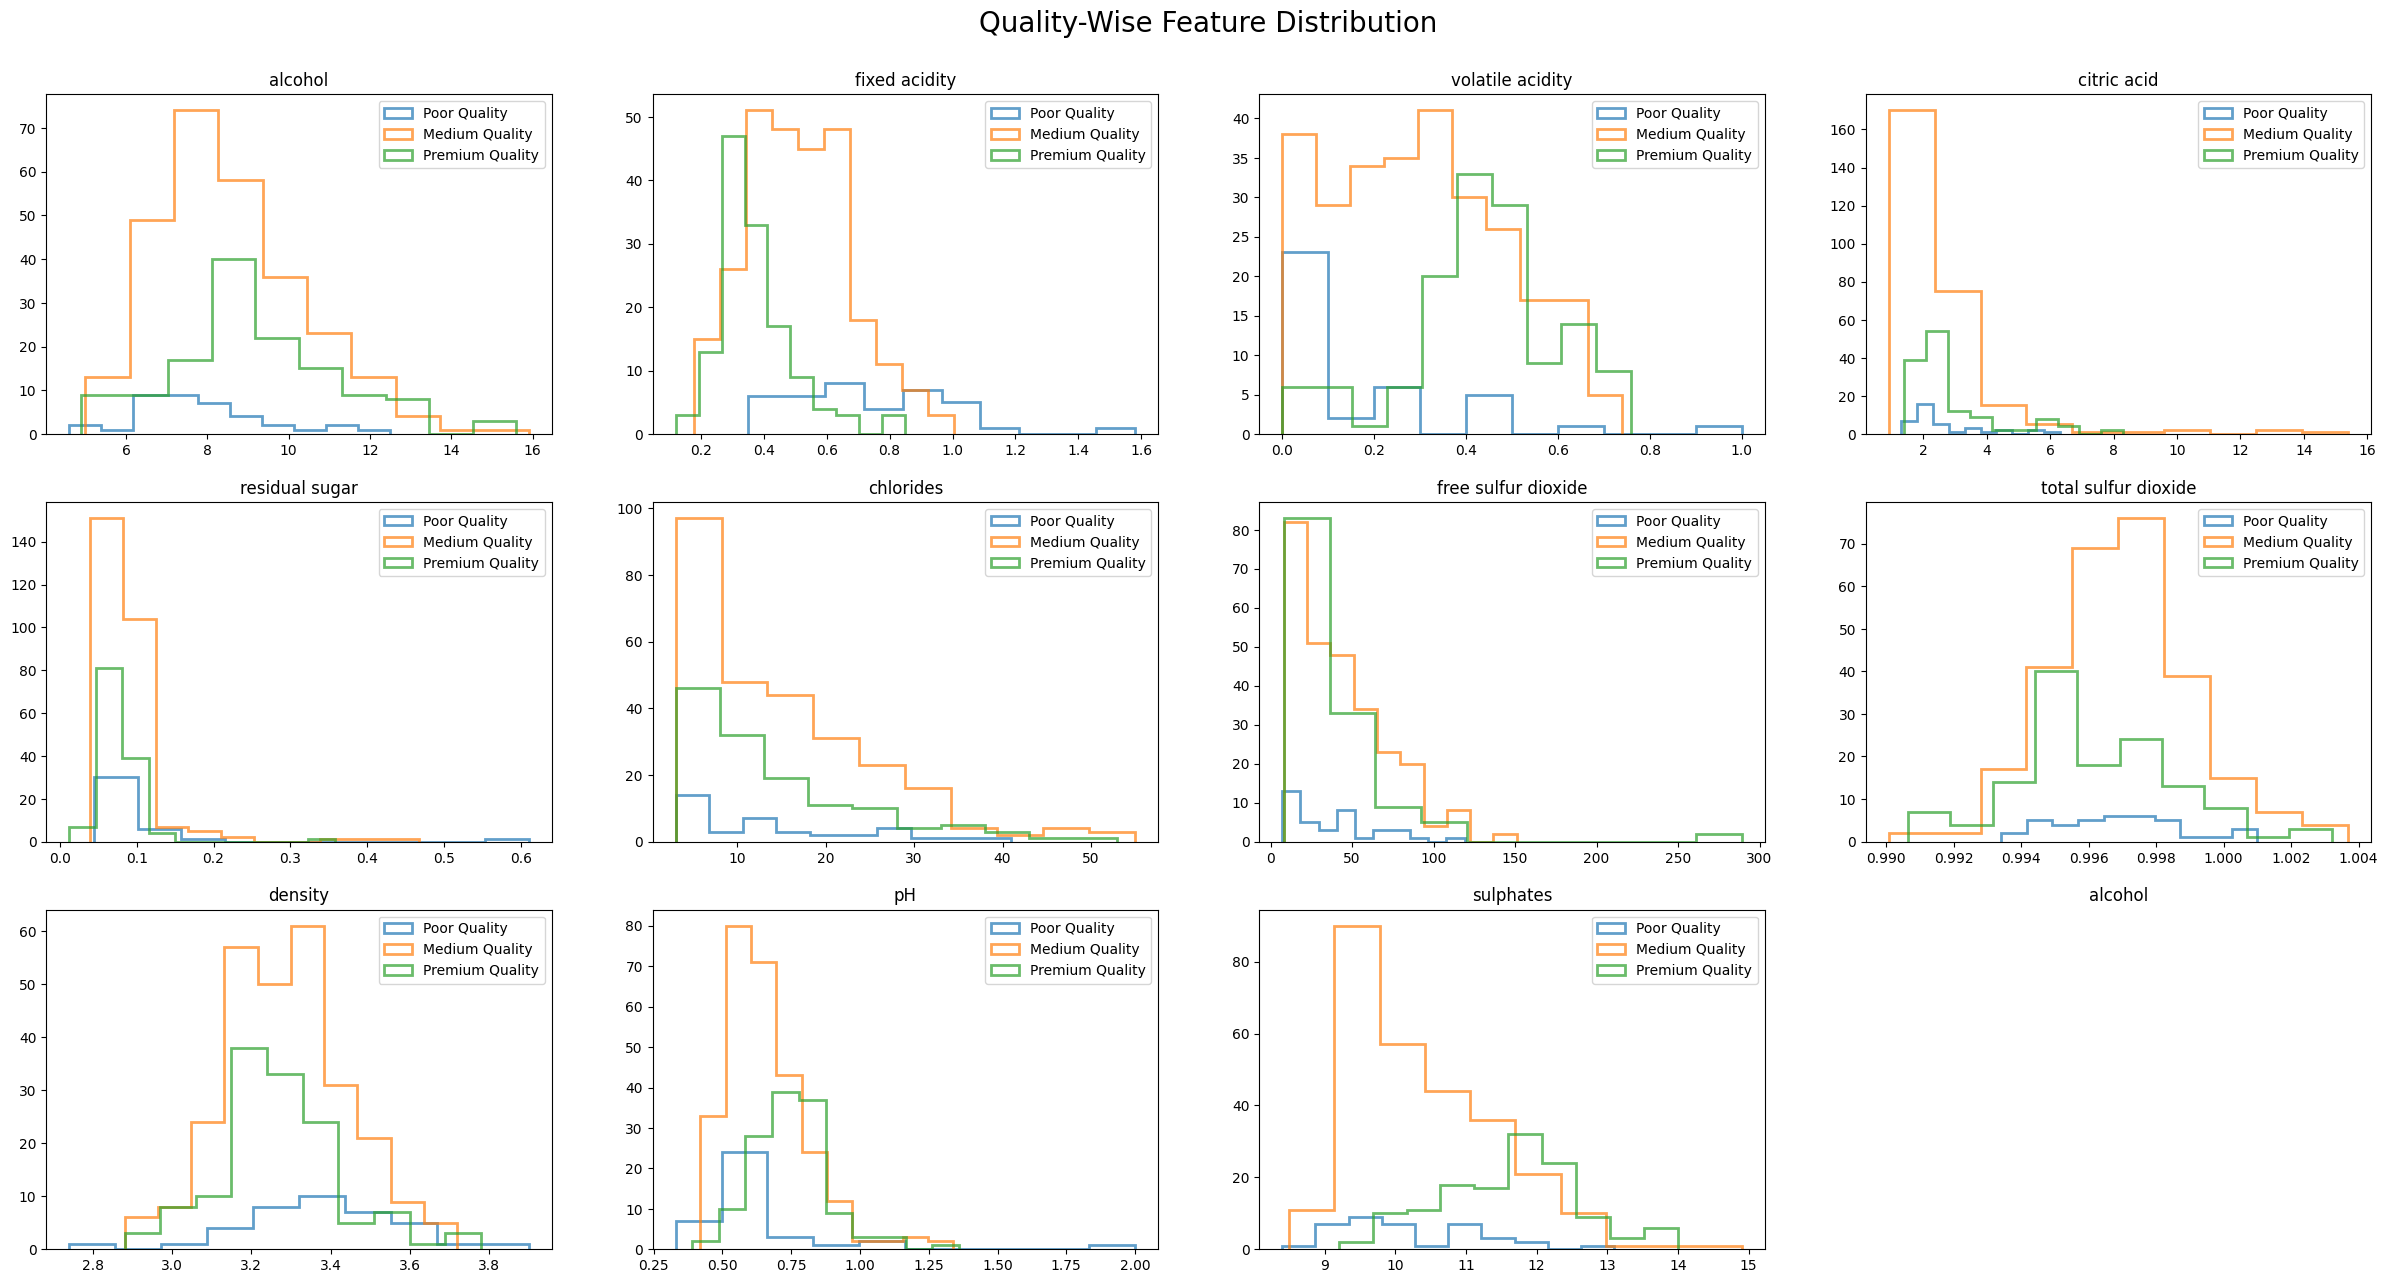

In [121]:
plt.figure(figsize=(30, 15))
plt.title("Quality-Wise Feature Distribution", pad=45, fontdict={"size":20})
for quality in quality_data.keys():
    cols = quality_data[quality].columns[:-1]
    class_data = quality_data[quality]

    plt.ylabel("Frequency")
    plt.axis("off")

    for i in range(4):
        for j in range(3):
            idx = (i*3) + j
            col_name = cols[idx - 1]
            if(idx + 1 == 12):
                plt.subplot(3,4,idx + 1), plt.hist(class_data[cols[idx - 1]], density=True, alpha=0), plt.title(col_name)
            else:
                plt.subplot(3,4,idx + 1), plt.hist(class_data[cols[idx]], alpha=0.7, histtype="step", linewidth=2, label=str(quality)), plt.title(col_name)
                plt.legend(["Poor Quality", "Medium Quality", "Premium Quality"])
    

#### Class frequency plot

In [122]:
class_sample_distribution = {}
for key in quality_data.keys():
    class_sample_distribution[key] = len(quality_data[key])

In [123]:
class_sample_distribution

{'Poor Quality': 38, 'Medium Quality': 272, 'Premium Quality': 132}

<BarContainer object of 3 artists>

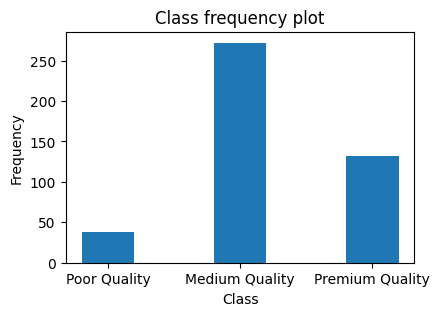

In [124]:
plt.figure(figsize=(4.5,3))
plt.title("Class frequency plot")
plt.xlabel("Class"), plt.ylabel("Frequency")
plt.bar(class_sample_distribution.keys(), class_sample_distribution.values(), width=0.4)

#### Answering Questions

**What can you say regarding the quality (Y) classes distribution?**

the class distribution is still imbalanced but is somewhat better than the older dataset since there is lesser difference between the sample count of each class unlike the previous dataset

**What is your conclusion regarding the expected performance of the classifier?**

Due to the biased nature of class samples, it is expected that the model will generalize poorly on real life data. The model may have high accuracy, in this case by classifiying the majority class correctly but will end up having low classification accuracy for the poor and premium class when seen indivisually.

It is probable that this dataset will lead to better results compared to the previous dataset due to better sampling ratios but because the samples overall are lesser than the previous dataset, worse performance can also be expected.

## **B)** Perform one run of modeling and test. Compare the obtained test accuracy by using:
1. One versus All Classifier
And
2. One versus One Classifier

generate dataset for train and test using stratified sampling to keep same ratios of classes in train and test

In [125]:
X_new, y_new = data_new[data_new.columns[:-1]], data_new[data_new.columns[-1]]
x_train, x_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, stratify=y_new, random_state=3)

In [126]:
(data_new[data_new.columns[-1]] == y_new).value_counts()
y_new.value_counts()

quality
1    272
2    132
0     38
Name: count, dtype: int64

feature scaling

In [127]:
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#### **One VS One Classification**

In [128]:
ovo = OneVsOneClassifier(
    LogisticRegression(max_iter=500, penalty='l2')
).fit(x_train, y_train)

y_pred = ovo.predict(x_test)

**confusion matrix**

[]

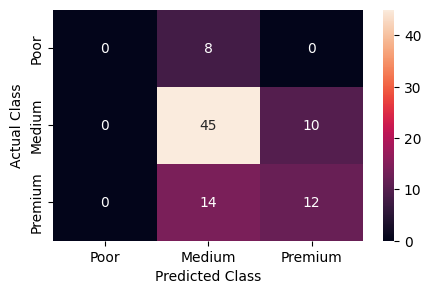

In [129]:
cf_martix_df = pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=y_test), index = ["Poor", "Medium", "Premium"],
                  columns = ["Poor", "Medium", "Premium"])
plt.figure(figsize = (5,3))
heatmap = sns.heatmap(cf_martix_df, annot=True, fmt="g")
heatmap.set_xlabel("Predicted Class")
heatmap.set_ylabel("Actual Class")
plt.plot()

here we can see that all predictions for the poor class were incorrect and more than half the predictions of premium class were also incorrect which is not desirable.

**classification report**

In [130]:
print(classification_report(y_pred=y_pred, y_true=y_test, zero_division=True))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         8
           1       0.67      0.82      0.74        55
           2       0.55      0.46      0.50        26

    accuracy                           0.64        89
   macro avg       0.74      0.43      0.41        89
weighted avg       0.66      0.64      0.60        89



#### **One VS Rest Classification**

In [131]:
ovo = OneVsRestClassifier(
    LogisticRegression(penalty='l2')
).fit(x_train, y_train)

y_pred = ovo.predict(x_test)

**confusion matrix**

[]

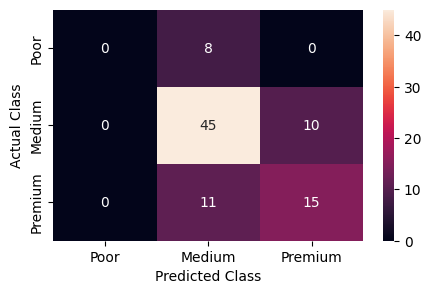

In [132]:
cf_martix_df = pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=y_test), index = ["Poor", "Medium", "Premium"],
                  columns = ["Poor", "Medium", "Premium"])
plt.figure(figsize = (5,3))
heatmap = sns.heatmap(cf_martix_df, annot=True, fmt="g")
heatmap.set_xlabel("Predicted Class")
heatmap.set_ylabel("Actual Class")
plt.plot()

here we can see that all predictions for the poor class were incorrect and more close to half the predictions of premium class were also incorrect which is not desirable.

**classification report**

In [133]:
print(classification_report(y_pred=y_pred, y_true=y_test, zero_division=True))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         8
           1       0.70      0.82      0.76        55
           2       0.60      0.58      0.59        26

    accuracy                           0.67        89
   macro avg       0.77      0.47      0.45        89
weighted avg       0.70      0.67      0.64        89



# Observations

It can be seen that the accuracy decreases in the second dataset which is reasonable due to the lower number of samples across classes, but the model also learns slightly better for minority classes in the second dataset since the sampling ratios across class are not that varying and there are lesser true negatives for the predictions for the premium class.

It can be concluded that with better class distribution, it is likely that the performance will increase in contrast to when the class distributions are highly biased